In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [4]:
datadir='/home/pbatra/Dropbox/airport/nyu/datasets/redfin'


### Load the data

In [5]:
df = pd.read_csv(f'{datadir}/redfin_2018-09-06-09-10-12.houston.csv')

In [6]:
df.shape

(256, 27)

In [7]:
df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE',
       'ZIP', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS',
       'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [8]:
df.head(10)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,18622 Flagstone Creek Rd,Houston,TX,77084,228500,4.0,2.5,Oak Ridge Place Sec 06,2634.0,5775.0,2007.0,83,87.0,46.0,Active,NaN,NaN,http://www.redfin.com/TX/Houston/18622-Flagsto...,HARMLS,10023448,N,Y,29.812191,-95.694574
1,MLS Listing,NaN,Single Family Residential,4323 Aspenglen Dr,Houston,TX,77084,115000,2.0,2.0,Bear Creek Village,1344.0,5500.0,1979.0,1,86.0,38.0,Active,NaN,NaN,http://www.redfin.com/TX/Houston/4323-Aspengle...,HARMLS,6775078,N,Y,29.836912,-95.644008
2,MLS Listing,NaN,Single Family Residential,2511 Creek Meadow Dr,Houston,TX,77084,154995,3.0,2.0,Westlake Forest Sec 01,1650.0,7508.0,1978.0,1,94.0,40.0,Active,NaN,NaN,http://www.redfin.com/TX/Houston/2511-Creek-Me...,HARMLS,90914049,N,Y,29.803834,-95.719082
3,MLS Listing,NaN,Single Family Residential,6603 Langham Way,Houston,TX,77084,150000,3.0,2.0,Northglen,1526.0,6900.0,1979.0,1,98.0,20.0,Active,NaN,NaN,http://www.redfin.com/TX/Houston/6603-Langham-...,HARMLS,23838927,N,Y,29.872906,-95.675728
4,MLS Listing,NaN,Single Family Residential,2014 Blindlake Dr,Houston,TX,77084,174990,3.0,2.0,Westlake,1558.0,7800.0,1974.0,1,112.0,37.0,Active,NaN,NaN,http://www.redfin.com/TX/Houston/2014-Blindlak...,HARMLS,37832502,N,Y,29.796596,-95.708739
5,MLS Listing,NaN,Single Family Residential,7010 Jasmine Trl,Houston,TX,77084,189900,3.0,2.0,Hearthstone Place,1889.0,7103.0,1998.0,1,101.0,35.0,Active,NaN,NaN,http://www.redfin.com/TX/Houston/7010-Jasmine-...,HARMLS,37094502,N,Y,29.877778,-95.630249
6,MLS Listing,NaN,Single Family Residential,4723 Autumn Pine Ln,Houston,TX,77084,300000,5.0,3.5,Lakes/pine Forest Sec 4,3177.0,8125.0,2009.0,1,94.0,36.0,Active,NaN,NaN,http://www.redfin.com/TX/Houston/4723-Autumn-P...,HARMLS,76636424,N,Y,29.839089,-95.674762
7,MLS Listing,NaN,Single Family Residential,4522 Pine Hollow Trce,Houston,TX,77084,200998,3.0,2.0,Pine Forrest Landing,1780.0,6206.0,2013.0,1,113.0,NaN,Active,NaN,NaN,http://www.redfin.com/TX/Houston/4522-Pine-Hol...,HARMLS,90576643,N,Y,29.839523,-95.662002
8,MLS Listing,NaN,Townhouse,6103 Yorkglen Manor Ln,Houston,TX,77084,141000,3.0,2.5,Villages/langham Crk Sec 7,1659.0,2778.0,2007.0,1,85.0,127.0,Active,NaN,NaN,http://www.redfin.com/TX/Houston/6103-Yorkglen...,HARMLS,14927015,N,Y,29.865595,-95.650786
9,MLS Listing,NaN,Single Family Residential,4507 Turf Valley Dr,Houston,TX,77084,188000,3.0,2.0,Bear Creek Village Sec 01,1994.0,7980.0,1975.0,2,94.0,38.0,Active,NaN,NaN,http://www.redfin.com/TX/Houston/4507-Turf-Val...,HARMLS,16734256,N,Y,29.839541,-95.640476


### how many NaN do I have? Check by looking at the shape after calling dropna()

In [9]:
print(df.shape)
print(df.dropna().shape)


(256, 27)
(0, 27)


### I lose all my data, how many NaNs per column?

In [10]:
nan_counts = df.isnull().sum()
display(nan_counts)


SALE TYPE                       0
SOLD DATE                     256
PROPERTY TYPE                   0
ADDRESS                         0
CITY                            0
STATE                           0
ZIP                             0
PRICE                           0
BEDS                            4
BATHS                           4
LOCATION                        1
SQUARE FEET                     4
LOT SIZE                       16
YEAR BUILT                      4
DAYS ON MARKET                  0
$/SQUARE FEET                   4
HOA/MONTH                      12
STATUS                          0
NEXT OPEN HOUSE START TIME    246
NEXT OPEN HOUSE END TIME      246
URL                             0
SOURCE                          0
MLS#                            0
FAVORITE                        0
INTERESTED                      0
LATITUDE                        0
LONGITUDE                       0
dtype: int64

### Looks like we have a few columns with lots of null/NaN values, let's drop columns where more than half the values are Null/NaN

In [11]:
drop_colnames = list(nan_counts[nan_counts>=(df.shape[0]//2)].index )
df = df.drop(drop_colnames, axis=1)

### Let's check the number of Null/NaNs now



In [12]:
new_nan_counts = df.isnull().sum()
display(new_nan_counts)


SALE TYPE          0
PROPERTY TYPE      0
ADDRESS            0
CITY               0
STATE              0
ZIP                0
PRICE              0
BEDS               4
BATHS              4
LOCATION           1
SQUARE FEET        4
LOT SIZE          16
YEAR BUILT         4
DAYS ON MARKET     0
$/SQUARE FEET      4
HOA/MONTH         12
STATUS             0
URL                0
SOURCE             0
MLS#               0
FAVORITE           0
INTERESTED         0
LATITUDE           0
LONGITUDE          0
dtype: int64

### Create a single train/test split on the data

In [13]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)


In [14]:
print(df_train.shape)
print(df_test.shape)

(204, 24)
(52, 24)


## calculate medians for non-String columns with nans from train data only

In [15]:
nancols = list(new_nan_counts[ new_nan_counts>0].index)
impute_vals = dict()

for nc in nancols:
    is_string = df_train[nc].dtypes=='object'
    this_mean = ''
    if not is_string:
        this_mean = np.nanmedian(df_train[nc])
    impute_vals[nc] = this_mean

print(impute_vals)

{'BEDS': 3.0, 'BATHS': 2.5, 'LOCATION': '', 'SQUARE FEET': 2194.0, 'LOT SIZE': 6900.0, 'YEAR BUILT': 1993.0, '$/SQUARE FEET': 94.0, 'HOA/MONTH': 38.0}


### Replace NA values in train and test dataframes with above values

In [16]:
df_train = df_train.fillna(impute_vals)
df_test = df_test.fillna(impute_vals)

### Visualize features (look at train data only!!)

In [17]:
numeric_features = [ colname for colname in df_train.columns if df_train[colname].dtypes!='object']
print(numeric_features)

['ZIP', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'MLS#', 'LATITUDE', 'LONGITUDE']


In [18]:
df_train[numeric_features].nunique()

ZIP                 1
PRICE             141
BEDS                7
BATHS               9
SQUARE FEET       186
LOT SIZE          155
YEAR BUILT         44
DAYS ON MARKET    100
$/SQUARE FEET      63
HOA/MONTH          37
MLS#              204
LATITUDE          200
LONGITUDE         195
dtype: int64

In [19]:
df_train[numeric_features].describe()

,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,MLS#,LATITUDE,LONGITUDE
count,204.0,2.040000e+02,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,2.040000e+02,204.000000,204.000000
mean,77084.0,2.371459e+05,3.568627,2.509804,2302.259804,9056.377451,1993.593137,47.191176,110.656863,45.098039,5.512687e+07,29.838647,-95.668005
std,0.0,2.570665e+05,0.781684,0.671299,644.330917,19892.383294,14.128759,42.560854,229.402393,23.894683,2.765539e+07,0.020927,0.027696
min,77084.0,1.100000e+05,1.000000,1.000000,846.000000,2151.000000,1974.000000,1.000000,50.000000,20.000000,2.582650e+05,29.792832,-95.719493
25%,77084.0,1.795000e+05,3.000000,2.000000,1815.750000,6189.750000,1980.000000,15.000000,84.750000,33.000000,3.092818e+07,29.821340,-95.691556
50%,77084.0,2.000000e+05,3.000000,2.500000,2194.000000,6900.000000,1993.000000,35.000000,94.000000,38.000000,5.986534e+07,29.841763,-95.667724
75%,77084.0,2.460000e+05,4.000000,2.500000,2690.250000,7875.750000,2006.000000,67.250000,103.000000,50.000000,7.734083e+07,29.854029,-95.640845
max,77084.0,3.699000e+06,7.000000,5.500000,4257.000000,275734.000000,2018.000000,232.000000,3363.000000,189.000000,9.880200e+07,29.877778,-95.623515


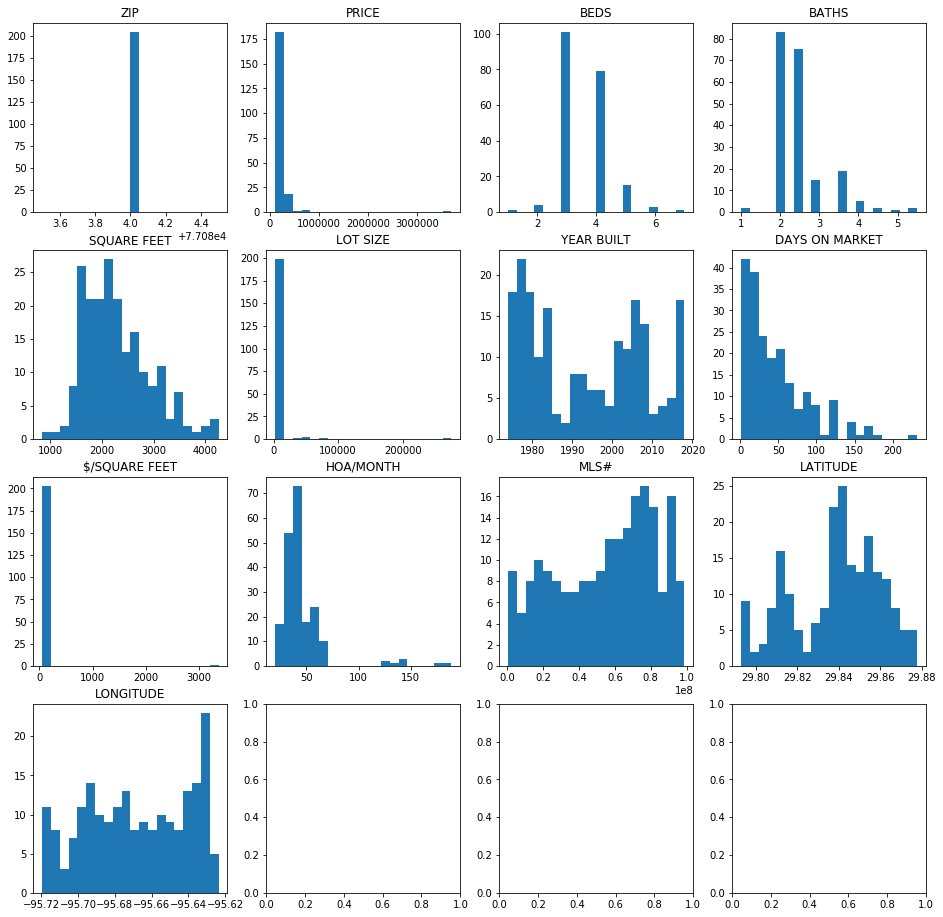

<Figure size 432x288 with 0 Axes>

In [20]:
cols = 4
rows = int( np.ceil( len(numeric_features)/ cols))

fig, axes = plt.subplots(rows, cols, figsize=(16,16))

for i in range(len(numeric_features)):
    this_row = int(np.floor(i/cols))
    this_col = int(i%cols)
    feat = numeric_features[i]
    this_ax = axes[this_row][this_col]
    this_ax.hist(df_train[feat], bins=20)
    this_ax.set_title(feat)

plt.show()
plt.tight_layout()


### Lot size, Price and $/square feet look like they have outliers - let's winsorize

#### First compute winsorization values - using train data ONLY!

In [21]:
win_cols = ['LOT SIZE','PRICE','$/SQUARE FEET', 'HOA/MONTH']
win_values = [ np.percentile(df_train[col], 95) for col in win_cols ]

win_dict = dict(zip(win_cols, win_values))
print(win_dict)

{'LOT SIZE': 10199.3, 'PRICE': 313391.24999999994, '$/SQUARE FEET': 122.39999999999998, 'HOA/MONTH': 69.54999999999998}


In [22]:
for col in win_cols:
    new_col = f'{col}_winsorized'
    df_train[new_col] = df_train[col]
    df_test[new_col] = df_test[col]
    df_train.loc[df_train[col]>=win_dict[col], new_col] = win_dict[col]
    df_test.loc[df_test[col]>=win_dict[col], new_col] = win_dict[col]


### Let's visualize again

['ZIP', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'MLS#', 'LATITUDE', 'LONGITUDE', 'LOT SIZE_winsorized', 'PRICE_winsorized', '$/SQUARE FEET_winsorized', 'HOA/MONTH_winsorized']


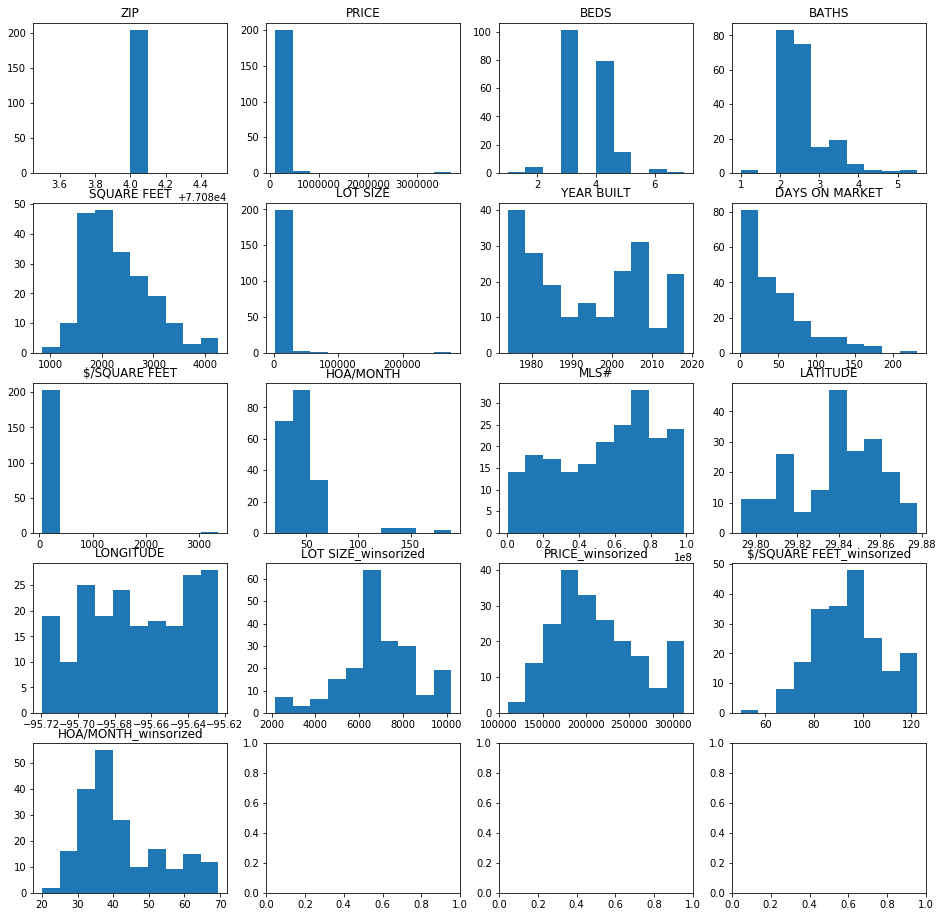

In [23]:
numeric_features = [ colname for colname in df_train.columns if df_train[colname].dtypes!='object']
print(numeric_features)

cols = 4
rows = int( np.ceil( len(numeric_features)/ cols))

fig, axes = plt.subplots(rows, cols, figsize=(16,16))

for i in range(len(numeric_features)):
    this_row = int(np.floor(i/cols))
    this_col = int(i%cols)
    feat = numeric_features[i]
    this_ax = axes[this_row][this_col]
    this_ax.hist(df_train[feat], bins=10)
    this_ax.set_title(feat)

plt.show()



## What should our target variable be?

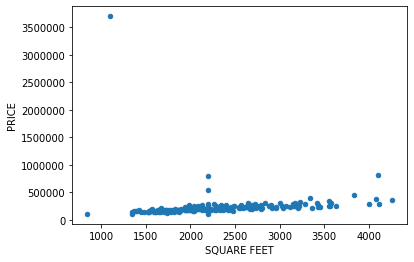

In [24]:
df_train.plot.scatter('SQUARE FEET','PRICE')



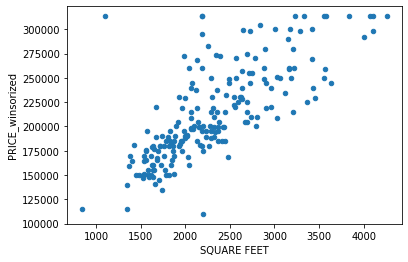

In [25]:
df_train.plot.scatter('SQUARE FEET','PRICE_winsorized')


### Let's run regressions on existing features


#### You may also want to create some features e.g.
 - age, in years

In [26]:
reg_features = ['BEDS', 'BATHS', 'SQUARE FEET', 'DAYS ON MARKET', 'HOA/MONTH_winsorized', 'LOT SIZE_winsorized', '$/SQUARE FEET_winsorized']
#reg_features = ['BEDS', 'BATHS', 'SQUARE FEET', 'DAYS ON MARKET', 'HOA/MONTH', 'LOT SIZE', '$/SQUARE FEET']

target = 'PRICE_winsorized'

len(reg_features)

7

## Closed form linear regression - learn the coefficients

In [27]:
m = df_train.shape[0]
intercept_col = np.ones(m).reshape(-1,1)
feature_cols =  df_train[ reg_features ].values
train_data_x = np.concatenate( (intercept_col, feature_cols), axis=1)

X = np.matrix(train_data_x)
y = np.matrix(df_train[ [target] ])

p_mat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) 
coefs =  np.ravel(p_mat)

print(coefs)

[-1.60221704e+05  5.19742479e+02 -4.01476051e+03  7.15035540e+01
  1.19804533e+02  2.68588101e+02  3.86527377e+00  1.83570126e+03]


### Sci-Kit learn's implementation?

In [28]:
from sklearn import linear_model

X_nointercept = np.matrix(feature_cols)

lm1 = linear_model.LinearRegression(fit_intercept=True)
lm1.fit(X_nointercept, y)
print(lm1.intercept_)
print(lm1.coef_)

[-160221.70374907]
[[ 5.19742479e+02 -4.01476051e+03  7.15035540e+01  1.19804533e+02
   2.68588101e+02  3.86527377e+00  1.83570126e+03]]


In [29]:
lm2 = linear_model.LinearRegression(fit_intercept=False)
lm2.fit(X, y)
print(lm2.intercept_)
print(lm2.coef_)

0.0
[[-1.60221704e+05  5.19742479e+02 -4.01476051e+03  7.15035540e+01
   1.19804533e+02  2.68588101e+02  3.86527377e+00  1.83570126e+03]]


## Calculate in-sample predictions and analyze performance

In [30]:
actuals_train = df_train['PRICE_winsorized'].values
pred_train = coefs[0] + (coefs[1:] * df_train[reg_features].values).sum(axis=1)
r_squared_train = metrics.r2_score(actuals_train, pred_train)

In [36]:
metrics.r2_score(actuals_train, pred_train)

0.8535680194610815

In [31]:
metrics.mean_squared_error(actuals_train, pred_train)

341883953.90385896

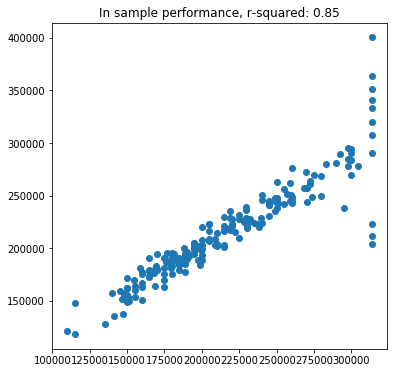

In [32]:
fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(actuals_train, pred_train, marker='o' )
plt.title(f'In sample performance, r-squared: {r_squared_train:.2f}')
plt.show()

## Calculate out-of-sample predictions and analyze performance

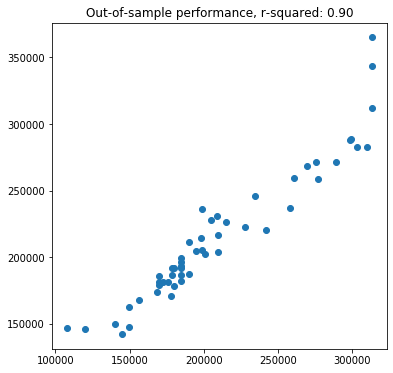

In [33]:
actuals_test  = df_test['PRICE_winsorized'].values
pred_test = coefs[0] + (coefs[1:] * df_test[reg_features].values).sum(axis=1)
r_squared_test = metrics.r2_score(actuals_test, pred_test)

fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(actuals_test, pred_test, marker='o' )
plt.title(f'Out-of-sample performance, r-squared: {r_squared_test:.2f}')
plt.show()

## Scikit-learn linear regression

### Let's check in-sample performance of sklearn fit, should be the same!

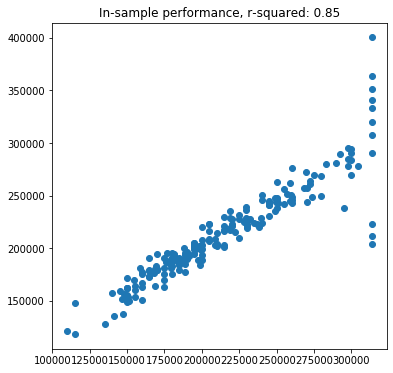

In [34]:
pred_train_sklearn = lm1.predict( df_train[reg_features] )
r_squared_train = metrics.r2_score(actuals_train, pred_train_sklearn)

fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(actuals_train, pred_train_sklearn, marker='o' )
plt.title(f'In-sample performance, r-squared: {r_squared_train:.2f}')
plt.show()

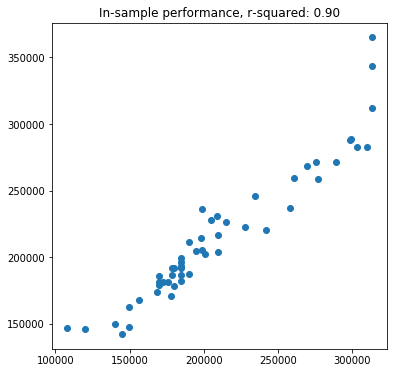

In [35]:
pred_test_sklearn = lm1.predict( df_test[reg_features] )
r_squared_test = metrics.r2_score(actuals_test, pred_test_sklearn)

fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(actuals_test, pred_test_sklearn, marker='o' )
plt.title(f'In-sample performance, r-squared: {r_squared_test:.2f}')
plt.show()


### <font color='green'> In-class exercise


### <font color='green'> <ol>    <li>Try the above regressions WITH un-winsorized price as the target variable <li> Try the above regressions winsorized price as the target variable but with un-winsorized features   </ol>    </font>